In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [24]:
#Read Dataset from Excel files and store it in a Pandas Dataframe

train = pd.read_excel("Data_Train.xlsx")

In [12]:
print("Rows in dataset are: ", train.shape[0])
print("Columns in dataset are: ", train.shape[1])

Rows in dataset are:  6237
Columns in dataset are:  9


In [13]:
train.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [6]:
train.columns

Index(['Title', 'Author', 'Edition', 'Reviews', 'Ratings', 'Synopsis', 'Genre',
       'BookCategory', 'Price'],
      dtype='object')

In [25]:
#Dropping Title and Author variables

#Method1 ** not recommended
#train=train.loc[:,['Edition', 'Reviews', 'Ratings', 'Synopsis', 'Genre','BookCategory','Price']]

#Method2
train.drop(['Title', 'Author'], axis=1, inplace=True)

In [26]:
train.head()

,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [34]:
train['Edition_Type1'] = train['Edition'].str.split(",– ", n = 1, expand = True)[0]

In [39]:
train['Edition_Type2'] = train['Edition'].str.split(",– ", n = 1, expand = True)[1]

In [62]:
train["Reviews_Numbers"] = train.Reviews.str.slice(0,3)

In [65]:
train["Rating_Numbers"] = train.Ratings.str.replace(r"[a-zA-Z]",'')

In [66]:
train

,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Edition_Type1,Edition_Type2,Reviews_Numbers,Rating_Numbers
0,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,Paperback,10 Mar 2016,4.0,8
1,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,Paperback,7 Nov 2012,3.9,14
2,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00,Paperback,25 Feb 1982,4.8,6
3,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,Paperback,5 Oct 2017,4.1,13
4,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,Hardcover,10 Oct 2006,5.0,1
5,"Paperback,– 5 May 2009",4.5 out of 5 stars,8 customer reviews,The revised edition of the bestselling ChiRunn...,Healthy Living & Wellness (Books),Sports,900.00,Paperback,5 May 2009,4.5,8
6,"Paperback,– 5 Oct 2017",4.4 out of 5 stars,72 customer reviews,Agatha Christie’s most exotic murder mystery\n...,"Crime, Thriller & Mystery (Books)","Crime, Thriller & Mystery",224.00,Paperback,5 Oct 2017,4.4,72
7,"Hardcover,– Import, 1 Mar 2018",4.7 out of 5 stars,16 customer reviews,"Achieve a healthy body, mental alertness, and ...",Sports Training & Coaching (Books),Sports,836.00,Hardcover,"Import, 1 Mar 2018",4.7,16
8,"Paperback,– 15 Dec 2015",4.2 out of 5 stars,111 customer reviews,Karmayogi is the dramatic and inspiring story ...,Biographies & Autobiographies (Books),"Biographies, Diaries & True Accounts",130.00,Paperback,15 Dec 2015,4.2,111
9,"Paperback,– 26 Mar 2013",4.0 out of 5 stars,1 customer review,‘This is the original game of thrones’ George ...,Action & Adventure (Books),Action & Adventure,695.00,Paperback,26 Mar 2013,4.0,1


In [67]:
train.columns

Index(['Edition', 'Reviews', 'Ratings', 'Synopsis', 'Genre', 'BookCategory',
       'Price', 'Edition_Type1', 'Edition_Type2', 'Reviews_Numbers',
       'Rating_Numbers'],
      dtype='object')

In [68]:
train.drop(['Edition', 'Reviews', 'Ratings', 'Synopsis', 'Edition_Type2'], axis=1, inplace=True)

# Data labelling --> Categorical to Numbers

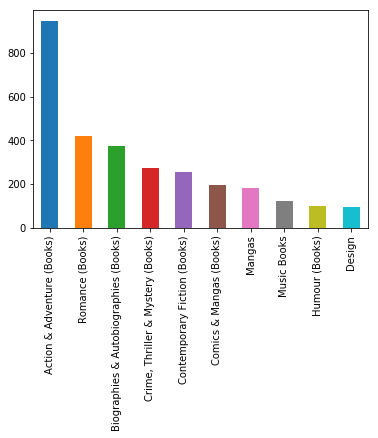

In [75]:
train['Genre'].value_counts()[:10].plot(kind='Bar')

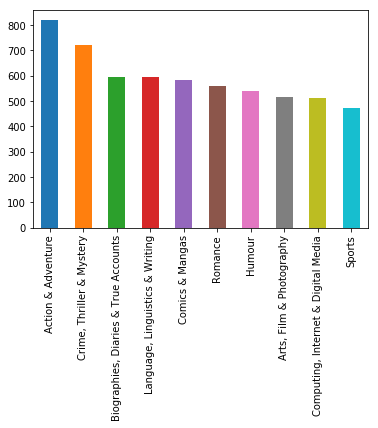

In [76]:
train['BookCategory'].value_counts()[:10].plot(kind='Bar')

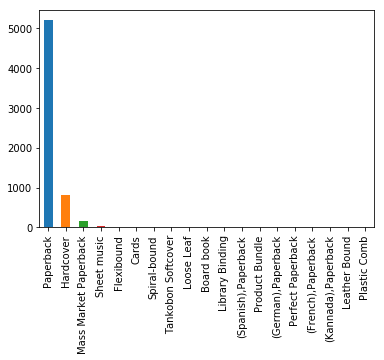

In [78]:
train['Edition_Type1'].value_counts().plot(kind='Bar')

In [81]:
train

,Genre,BookCategory,Price,Edition_Type1,Reviews_Numbers,Rating_Numbers
0,Action & Adventure (Books),Action & Adventure,220.00,Paperback,4.0,8
1,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,Paperback,3.9,14
2,International Relations,Humour,299.00,Paperback,4.8,6
3,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,Paperback,4.1,13
4,Photography Textbooks,"Arts, Film & Photography",965.62,Hardcover,5.0,1
5,Healthy Living & Wellness (Books),Sports,900.00,Paperback,4.5,8
6,"Crime, Thriller & Mystery (Books)","Crime, Thriller & Mystery",224.00,Paperback,4.4,72
7,Sports Training & Coaching (Books),Sports,836.00,Hardcover,4.7,16
8,Biographies & Autobiographies (Books),"Biographies, Diaries & True Accounts",130.00,Paperback,4.2,111
9,Action & Adventure (Books),Action & Adventure,695.00,Paperback,4.0,1


In [79]:
from sklearn.preprocessing import LabelEncoder

In [80]:
le = LabelEncoder()

In [84]:
#Apply Label encoder on "Genre"
train['Genre'] = le.fit_transform(train["Genre"])


In [86]:
#Apply Label encoder on "Genre"
train['BookCategory'] = le.fit_transform(train["BookCategory"])

train['Edition_Type1'] = le.fit_transform(train["Edition_Type1"])

In [88]:
train.columns

Index(['Genre', 'BookCategory', 'Price', 'Edition_Type1', 'Reviews_Numbers',
       'Rating_Numbers'],
      dtype='object')

In [89]:
train = train[['Genre', 'BookCategory', 'Edition_Type1', 'Reviews_Numbers', 'Rating_Numbers', 'Price']]

In [91]:
train

,Genre,BookCategory,Edition_Type1,Reviews_Numbers,Rating_Numbers,Price
0,1,0,12,4.0,8,220.00
1,74,2,12,3.9,14,202.93
2,193,6,12,4.8,6,299.00
3,92,5,12,4.1,13,180.00
4,253,1,7,5.0,1,965.62
5,161,10,12,4.5,8,900.00
6,95,5,12,4.4,72,224.00
7,311,10,7,4.7,16,836.00
8,34,2,12,4.2,111,130.00
9,1,0,12,4.0,1,695.00


In [92]:
train.isnull().sum()

Genre              0
BookCategory       0
Edition_Type1      0
Reviews_Numbers    0
Rating_Numbers     0
Price              0
dtype: int64

In [105]:
train.dtypes

Genre                int32
BookCategory         int32
Edition_Type1        int32
Reviews_Numbers    float64
Rating_Numbers     float64
Price              float64
dtype: object

In [100]:
train['Reviews_Numbers'] = train['Reviews_Numbers'].astype(float)

In [103]:
train['Rating_Numbers'] = train['Rating_Numbers'].apply(lambda x: x.replace(",","")).astype(float)

In [104]:
train.dtypes

Genre                int32
BookCategory         int32
Edition_Type1        int32
Reviews_Numbers    float64
Rating_Numbers     float64
Price              float64
dtype: object

In [106]:
train.columns

Index(['Genre', 'BookCategory', 'Edition_Type1', 'Reviews_Numbers',
       'Rating_Numbers', 'Price'],
      dtype='object')

# Apply algorithm

In [107]:
train_copy = train.copy()

In [108]:
#Split x and y

x = train.drop(["Price"], axis=1)

In [109]:
y = train["Price"]

In [110]:
#Split into train and test dataset
from sklearn.model_selection import train_test_split


In [111]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [112]:
from sklearn.linear_model import LinearRegression

In [113]:
lr = LinearRegression()

In [114]:
model=lr.fit(X_train,y_train)

In [117]:
model.intercept_

1052.4177458978072

In [120]:
model.coef_

array([  0.58959448,  -8.79819344, -82.07552894,  95.21098543,
        -0.30097446])

In [121]:
x.columns

Index(['Genre', 'BookCategory', 'Edition_Type1', 'Reviews_Numbers',
       'Rating_Numbers'],
      dtype='object')

In [ ]:
#price = m1*'Genre' +  m2*'BookCategory' +  m3*'Edition_Type1' +  m4*'Reviews_Numbers' +  m5*'Rating_Numbers' + c

m1 = 0.58959448,
m2 = -8.79819344, 
m3 = -82.07552894,  
m4 = 95.21098543,
m5 = -0.30097446

c = 1052.4177458978072

In [116]:
prediction = model.predict(X_test)

In [123]:
prediction

array([533.49910205, 463.54720551, 624.99518061, ..., 608.77412592,
       516.9732256 , 467.18817747])

In [126]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [125]:
r2_score(y_test, prediction)

0.07935541918773803

In [127]:
mean_squared_error(y_test, prediction)

396225.0799057037

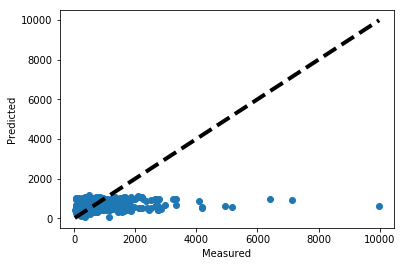

In [130]:
fig, ax = plt.subplots()
ax.scatter(y_test, prediction)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()